In [1]:
import sys
sys.path.append('../')

from train import get_data, construct_hyper_param
import argparse
from tqdm.auto import tqdm
import pandas as pd

In [2]:
parser = argparse.ArgumentParser()
args = construct_hyper_param(parser, notebook=True)

In [3]:
train_data, train_table, dev_data, dev_table, test_data, test_table, train_loader, dev_loader, test_loader = get_data('../data/sqlova_data/', args)

In [4]:
# check numeric value
def is_number(s):
    if str(s)=='Nan':
        return False
    
    try:
        float(s)
        return True
    except ValueError:
        pass
    
#     try:
#         import unicodedata
#         unicodedata.numeric(s)
#         return True
#     except (TypeError, ValueError):
#         pass
    return False

# Q: where value가 table에 있는 값이랑 다른게 얼마나 있는가?

In [5]:
def check_diff(dataset, datatable):
    problem_idx = []

    for idx, data in enumerate(tqdm(dataset)):  
        # unique values in table
        table_unique_values = [float(w) if is_number(w) else str(w).lower().strip() for w in set(sum(datatable[data['table_id']]['rows'], []))]

        # conditions
        conds = data['sql']['conds']

        check = 0 
        for cond in conds:
            wv = float(cond[2]) if is_number(cond[2]) else str(cond[2]).lower().strip()
            if wv in table_unique_values:
                check += 1

        if len(conds) != check:
            problem_idx.append(idx)
            
    return problem_idx

In [6]:
train_problem_idx = check_diff(train_data, train_table)
dev_problem_idx = check_diff(dev_data, dev_table)
test_problem_idx = check_diff(test_data, test_table)

In [7]:
print('train: ',len(train_problem_idx))
print('dev: ',len(dev_problem_idx))
print('test: ',len(test_problem_idx))

train:  90
dev:  10
test:  31


# 예외상황

1. 숫자형 비교인 경우(>, <) where value가 실제 table 안에 있는 value와 다르게 들어감
    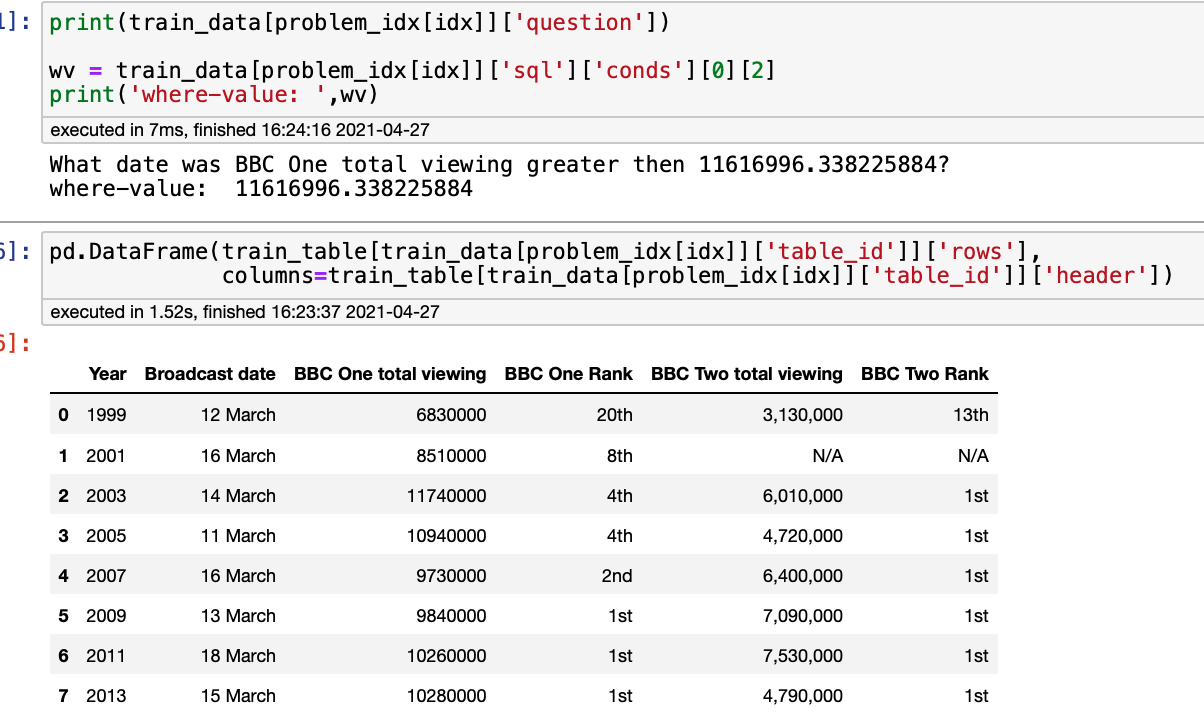
2. value 중간에 쉼표(,)가 들어간 경우 띄어쓰기 문제로 다르게 인식됨  
    - where-value: Justin Leonard, Phillip Price
    - table-value: Justin Leonard , Phillip Price

In [23]:
len(test_problem_idx)

31

In [24]:
idx = 0

In [28]:
print(test_data[test_problem_idx[idx]]['question'])

# wv = test_data[test_problem_idx[idx]]['sql']['conds'][0][2]
for cond in test_data[test_problem_idx[idx]]['sql']['conds']:
    print('where-value: ',cond[2])

How many tournaments in Texas had a purse higher than 330105.1624276874?
where-value:  Texas
where-value:  330105.1624276874


In [26]:
pd.DataFrame(test_table[test_data[test_problem_idx[idx]]['table_id']]['rows'], 
             columns=test_table[test_data[test_problem_idx[idx]]['table_id']]['header'])

,Date,Tournament,Location,Purse( $ ),Winner,Score,1st Prize( $ )
0,Jan 7,MONY Senior Tournament of Champions,California,250000,George Archer (2),283 (-5),37500
1,Feb 4,Royal Caribbean Classic,Florida,400000,Lee Trevino (1),206 (-7),60000
2,Feb 11,GTE Suncoast Classic,Florida,450000,Mike Hill (1),207 (-9),67500
3,Feb 18,Aetna Challenge,Florida,400000,Lee Trevino (2),200 (-16),60000
4,Mar 4,Vintage Chrysler Invitational,California,400000,Lee Trevino (3),205 (-11),60000
5,Mar 18,Vantage at The Dominion,Texas,300000,Jim Dent (3),205 (-11),45000
6,Apr 1,The Tradition at Desert Mountain,Arizona,800000,Jack Nicklaus (1),206 (-10),120000
7,Apr 15,PGA Seniors' Championship,Florida,450000,Gary Player (15),281 (-7),75000
8,Apr 29,Murata Reunion Pro-Am,Texas,400000,Frank Beard (1),207 (-9),60000
9,May 6,Las Vegas Senior Classic,Nevada,450000,Chi Chi Rodriguez (14),204 (-12),67500


In [135]:
table_unique_values = [float(w) if is_number(w) else str(w).lower() for w in set(sum(test_table[test_data[problem_idx[idx]]['table_id']]['rows'], []))]


In [136]:
table_unique_values

[3.0,
 4.0,
 5.0,
 7.0,
 9.0,
 nan,
 'completed',
 'nicole',
 'to which housemate should mikan open up?',
 'failed',
 'valerie, nicole, alex',
 'rona',
 'ejay, alex, nan',
 "shy must hide which housemate's possessions?",
 'day 46 (may 7, 2008)',
 'priscilla, rona, valerie',
 'day 51 (may 12, 2008)',
 'which housemate must shy take as her best friend?',
 'ejay',
 'beauty, ejay, alex',
 'day 45 (may 6, 2008)',
 'priscilla, valerie, alex, ejay',
 'shy must drive which male housemate mad?',
 'day 54 (may 15, 2008)',
 'beauty',
 'which housemate should the house players amuse?',
 'day 47 (may 8, 2008)']

In [125]:
wv.lower() in table_unique_values

False